### Explore the reference bulk expression data

In [104]:
import rds2py

import numpy
import seaborn
import matplotlib.pyplot

from sklearn.cluster import AgglomerativeClustering

In [33]:
# Load the reference dataset (expression and methylation)
file = rds2py.read_rds("/home/kubicaj/calc/phase2/data/reference_pdac.rds")

### Explore the expression data

In [34]:
bulk_RNA = file.get("ref_bulkRNA")

In [37]:
print(bulk_RNA.matrix)

print(bulk_RNA.matrix.shape) # shape=(genes, cell types)

[[1.06747697e-01 1.02767854e+01 6.19426480e+00 1.61686727e-01
  8.58052335e-02]
 [1.19123408e+00 3.84204450e+00 2.88999093e+00 1.55964534e-02
  0.00000000e+00]
 [0.00000000e+00 4.38552573e-02 3.35604092e-02 3.43816408e+01
  5.24495543e-01]
 ...
 [2.46011081e+02 3.74992698e+02 2.58953960e+02 5.73348242e+01
  1.05447153e+02]
 [1.41497108e+02 7.42227886e+01 1.21482870e+02 7.20324122e+01
  3.77019442e+01]
 [7.00620717e+01 6.78937463e+01 2.53584506e+01 4.64977310e+01
  3.65489550e+01]]
(15908, 5)


In [38]:
# Save column names
gene_names = bulk_RNA.dimnames[0].as_list()

cell_types = bulk_RNA.dimnames[1].as_list()

### Clustering of genes based on expression

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=len(cell_types))

In [40]:
# Hierarchical clustering of genes based on expression data
labels = hierarchical_cluster.fit_predict(bulk_RNA.matrix)

In [41]:
# Get the label (cluster ID) for each gene
res = dict(zip(gene_names, labels))
res

{'A1BG': np.int64(0),
 'A1BG-AS1': np.int64(0),
 'A1CF': np.int64(0),
 'A2M': np.int64(0),
 'A2M-AS1': np.int64(0),
 'A2ML1': np.int64(0),
 'A4GALT': np.int64(0),
 'AAAS': np.int64(0),
 'AACS': np.int64(0),
 'AADAC': np.int64(0),
 'AADAT': np.int64(0),
 'AAED1': np.int64(0),
 'AAGAB': np.int64(0),
 'AAK1': np.int64(0),
 'AAMDC': np.int64(0),
 'AAMP': np.int64(0),
 'AANAT': np.int64(0),
 'AAR2': np.int64(0),
 'AARD': np.int64(0),
 'AARS': np.int64(0),
 'AARS2': np.int64(0),
 'AASDH': np.int64(0),
 'AASDHPPT': np.int64(0),
 'AASS': np.int64(0),
 'AATK': np.int64(0),
 'ABAT': np.int64(0),
 'ABCA1': np.int64(0),
 'ABCA10': np.int64(0),
 'ABCA12': np.int64(0),
 'ABCA13': np.int64(0),
 'ABCA2': np.int64(0),
 'ABCA3': np.int64(0),
 'ABCA4': np.int64(0),
 'ABCA5': np.int64(0),
 'ABCA6': np.int64(0),
 'ABCA7': np.int64(0),
 'ABCA8': np.int64(0),
 'ABCA9': np.int64(0),
 'ABCB1': np.int64(0),
 'ABCB10': np.int64(0),
 'ABCB11': np.int64(0),
 'ABCB4': np.int64(0),
 'ABCB5': np.int64(0),
 'ABCB6': n

<Axes: ylabel='Count'>

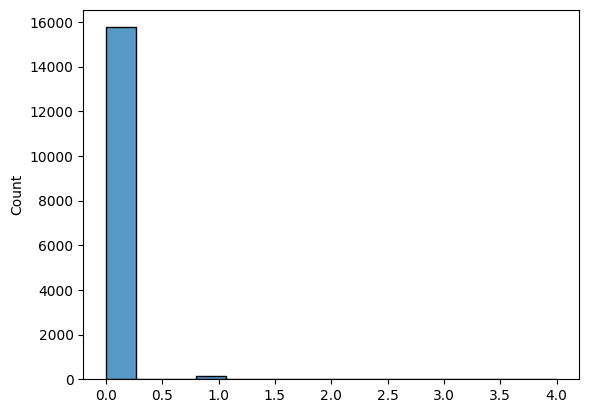

In [44]:
# Plot the histogram of label count
seaborn.histplot(res)

### Plot clustermap of expression data

In [45]:
# log transform the expression counts
bulk_matrix_log = numpy.log(bulk_RNA.matrix)
# Remove the -inf values with zeros
bulk_matrix_log = numpy.nan_to_num(bulk_matrix_log, neginf=0)

/tmp/ipykernel_93396/529170858.py:2: RuntimeWarning: divide by zero encountered in log
  bulk_matrix_log = numpy.log(bulk_RNA.matrix)


/home/kubicaj/pythonenvs/pyEnv_hadaca3/lib64/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/kubicaj/pythonenvs/pyEnv_hadaca3/lib64/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


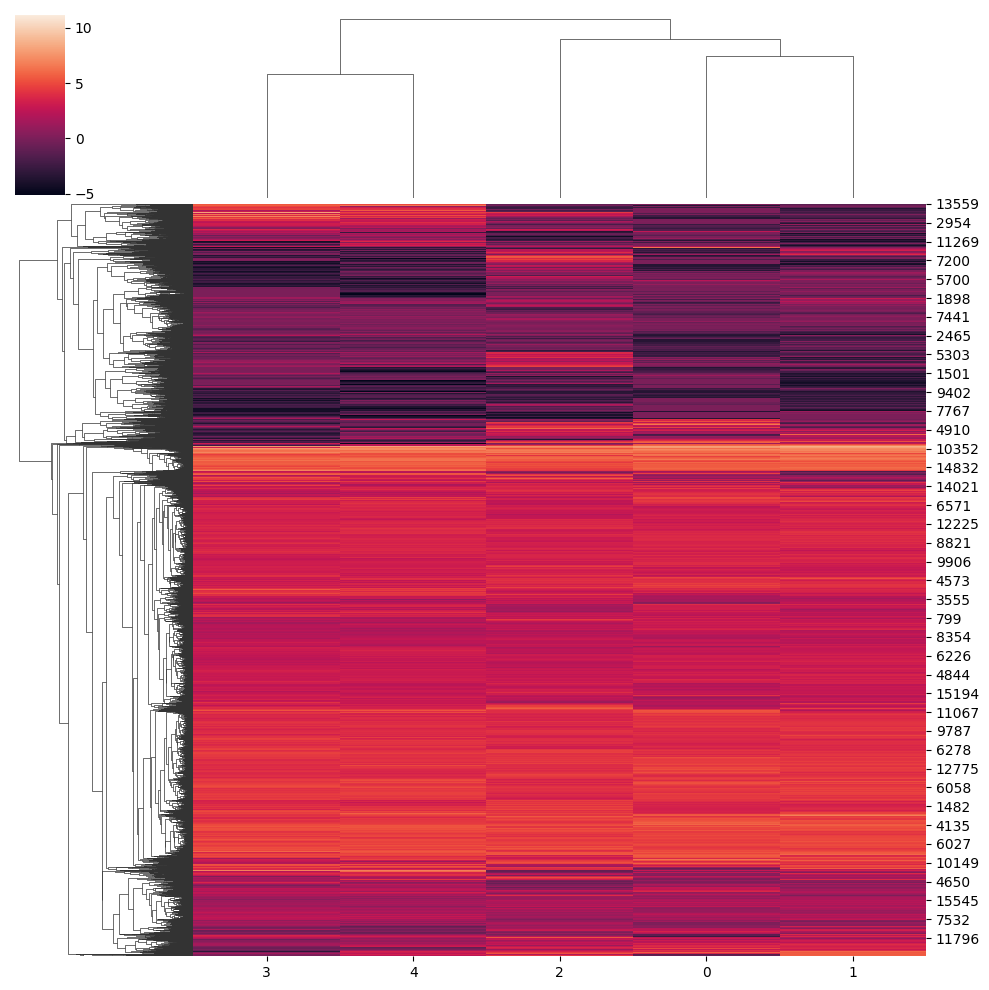

In [47]:
seaborn.clustermap(bulk_matrix_log) # x=cell types; y=genes; values=log-transformed expression

### Find genes that have the most distinct methylation among 5 cell types

In [49]:
bulk_met = file.get("ref_met")

In [50]:
cpg_names = bulk_met.dimnames[0].as_list()

In [85]:
# Calculate the differences between columns for each row
row_max = numpy.max(bulk_met.matrix, axis=1)

row_max2cellType = bulk_met.matrix.argmax(axis=1)

In [52]:
row_means_without_max = (numpy.sum(bulk_met.matrix, axis=1) - row_max) / (bulk_met.matrix.shape[1] - 1)

In [53]:
diffs = row_max - row_means_without_max
diffs

array([0.5487229 , 0.15941896, 0.02749593, ..., 0.03628369, 0.05796914,
       0.04981333])

In [54]:
sorted_indices = numpy.argsort(-diffs)
sorted_indices

array([ 6979, 12316,   102, ...,  4297,   697,  2026])

In [89]:
print("Rows sorted by how much one value (methylation beta value) differs from the rest:")
for idx in sorted_indices:
    print(f"row {idx}: {cpg_names[idx]}, diff: {diffs[idx]}, cell type: {cell_types[row_max2cellType[idx]]}")

Rows sorted by how much one value (methylation beta value) differs from the rest:
row 6979: cg08258650, diff: 0.8610048201940952, cell type: fibro
row 12316: cg14417329, diff: 0.8177693314060421, cell type: fibro
row 102: cg00117172, diff: 0.8116864917908015, cell type: classic
row 18600: cg21663431, diff: 0.8076620211409865, cell type: immune
row 22764: cg26509022, diff: 0.8063513662262508, cell type: fibro
row 22291: cg25949363, diff: 0.8061204962482694, cell type: fibro
row 9476: cg11191210, diff: 0.7999277036252136, cell type: classic
row 14932: cg17410236, diff: 0.7853993907375865, cell type: classic
row 8976: cg10605520, diff: 0.7845813345711076, cell type: classic
row 4120: cg04797323, diff: 0.7819395629058681, cell type: classic
row 4243: cg04956511, diff: 0.7813921110437269, cell type: fibro
row 4800: cg05656364, diff: 0.7733959673154087, cell type: fibro
row 1064: cg01234063, diff: 0.7705901999038068, cell type: classic
row 20959: cg24428042, diff: 0.7674960196527417, cell ty

In [ ]:
# check if the top and the worst results make sense
top_cpg = sorted_indices[0]
print(f"top differences: {bulk_met.matrix[top_cpg]}")

top_cpg = sorted_indices[-1]
print(f"worst differences: {bulk_met.matrix[top_cpg]}")

top differences: [0.05612968 0.93393624 0.11459704 0.06197544 0.0590235 ]
worst differences: [0.03915825 0.03689283 0.03779652 0.03883774 0.03851993]


In [96]:
# keep only the top CpG islands based on the threshold (the lowest mean of methylation across cell types)
threshold = min(numpy.mean(bulk_met.matrix, axis=0))

CpG_top_diff = {}
CpG_top_diff2cellType = {}

for idx in sorted_indices:
    diff = diffs[idx]
    if diff < threshold:
        continue
    CpG = cpg_names[idx]
    cell_type = cell_types[row_max2cellType[idx]]

    CpG_top_diff[CpG] = diff
    CpG_top_diff2cellType[CpG] = cell_type

In [95]:
CpG_top_diff2cellType

{'cg08258650': 'fibro',
 'cg14417329': 'fibro',
 'cg00117172': 'classic',
 'cg21663431': 'immune',
 'cg26509022': 'fibro',
 'cg25949363': 'fibro',
 'cg11191210': 'classic',
 'cg17410236': 'classic',
 'cg10605520': 'classic',
 'cg04797323': 'classic',
 'cg04956511': 'fibro',
 'cg05656364': 'fibro',
 'cg01234063': 'classic',
 'cg24428042': 'classic',
 'cg09628601': 'classic',
 'cg15164103': 'fibro',
 'cg17483510': 'classic',
 'cg08578641': 'immune',
 'cg15475323': 'immune',
 'cg19831575': 'classic',
 'cg21087137': 'classic',
 'cg02131853': 'fibro',
 'cg02599464': 'basal',
 'cg12686016': 'classic',
 'cg06800962': 'fibro',
 'cg11732619': 'classic',
 'cg14865868': 'fibro',
 'cg23771603': 'classic',
 'cg07696033': 'basal',
 'cg08077673': 'fibro',
 'cg20286200': 'classic',
 'cg06269753': 'classic',
 'cg03700462': 'classic',
 'cg00290506': 'classic',
 'cg10226546': 'fibro',
 'cg24620905': 'immune',
 'cg21902544': 'classic',
 'cg26258845': 'classic',
 'cg01086895': 'classic',
 'cg19923326': 'im

In [97]:
# map the top CpG islands to genes
# load CpG to gene mapping generated with src/meth_rna_mapping.ipynb
gene2CpG_top_diff = {}
gene2cellType_top_diff = {}

with open("/home/kubicaj/calc/hadaca3_teamB/data/mapping_meth_rna.csv" ,"r") as f:
    # skip header
    next(f)

    for line in f:
        split_line = line.rstrip().split(',')
        CpG, gene = split_line

        if CpG in CpG_top_diff:
            gene2CpG_top_diff[CpG] = gene
            cell_type = CpG_top_diff2cellType[CpG]
            gene2cellType_top_diff[CpG] = cell_type

print(f"Found {len(gene2CpG_top_diff)} genes that have cell-type specific methylated CpG islands")

Found 1713 genes that have cell-type specific methylated CpG islands


In [102]:
gene2cellType_top_diff.values()

dict_values(['immune', 'immune', 'classic', 'classic', 'immune', 'fibro', 'basal', 'endo', 'fibro', 'classic', 'fibro', 'endo', 'classic', 'basal', 'classic', 'immune', 'endo', 'classic', 'immune', 'fibro', 'immune', 'fibro', 'basal', 'fibro', 'endo', 'basal', 'endo', 'immune', 'fibro', 'immune', 'endo', 'immune', 'basal', 'basal', 'endo', 'fibro', 'classic', 'immune', 'fibro', 'endo', 'classic', 'fibro', 'immune', 'endo', 'immune', 'basal', 'classic', 'basal', 'fibro', 'classic', 'fibro', 'fibro', 'fibro', 'immune', 'fibro', 'immune', 'immune', 'immune', 'classic', 'fibro', 'fibro', 'immune', 'fibro', 'immune', 'classic', 'fibro', 'basal', 'endo', 'classic', 'immune', 'fibro', 'classic', 'fibro', 'classic', 'immune', 'basal', 'fibro', 'fibro', 'classic', 'endo', 'fibro', 'fibro', 'fibro', 'immune', 'fibro', 'endo', 'immune', 'classic', 'immune', 'fibro', 'basal', 'classic', 'basal', 'immune', 'immune', 'endo', 'immune', 'classic', 'endo', 'immune', 'fibro', 'fibro', 'immune', 'immune'

Text(0.5, 1.0, 'Distribution of cell types in genes that have cell-type specific methylated CpG islands')

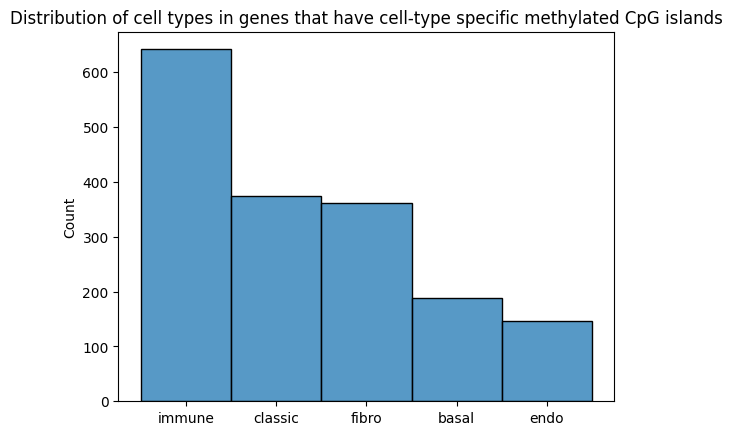

In [105]:
# Plot the distribution of cell-type specific methylated CpG islands
seaborn.histplot(gene2cellType_top_diff)
matplotlib.pyplot.title("Distribution of cell types in genes that have cell-type specific methylated CpG islands")